## Método de la transformada inversa  
Generación de números (pseudo)aleatorios con una distribución de probabilidad especifica

### Distribucion Triangular

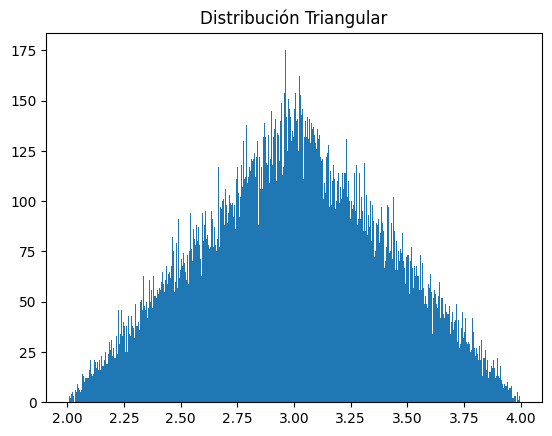

Valor esperado: 2.9977743092315046
Varianza: 0.1650397776190041


In [1]:
from random import random
import numpy as np
import matplotlib.pyplot as plt

#Definimos una función que generara una serie de números aleatorios con una distribución triangular
def Triangle(a = 0, b = .5, c = 1, n = 10000):
    x = []

    for i in range(n):
        y = random() #Se generan números aleatorios entre 0 y 1

        #Se aplica la función inversa de la distribución triangular
        if (y <= (b-a)/(c-a)): #Si los valores aleatorios generados son menores o iguales al area que hay entre a y b
            x.append(np.sqrt((c-a)*(b-a)*y)+a)
        elif (y > (b-a)/(c-a)): #Si los valores aleatorios generados son mayores al area que hay entre b y c
            x.append(c - np.sqrt((1-y)*(c-a)*(c-b)))
        else:
            x.append(0)
    return x

#Se generan n valores aleatorios con la distribución triangular
#Y se gráfica un histograma con los resultados, lo que vendría a ser una gráfica de su distribución
rand_values = Triangle(2,3,4,35000)
plot = plt.hist(rand_values, bins = 500)
plt.title("Distribución Triangular")
plt.show()

#Calculamos la media y varianza de los valores generados
print("Valor esperado:", np.mean(rand_values))
print("Varianza:", np.var(rand_values))